# Agentchat API with Assistant Agent

In [1]:
import asyncio
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_core.tools import FunctionTool
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
if not api_key:
    raise ValueError("Please set the OPENAI_API_KEY environment variable.")

In [2]:
model_client=OpenAIChatCompletionClient(model='gpt-4o',api_key=api_key)

In [3]:
my_assistant = AssistantAgent(name="Assistant",model_client=model_client)

In [11]:
result = await my_assistant.run(task="Who are you?")

In [13]:
print(result)

messages=[TextMessage(id='9d6d4ffe-12b3-4e1a-a0d2-20138d372136', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 32, 1, 317140, tzinfo=datetime.timezone.utc), content='Who are you?', type='TextMessage'), TextMessage(id='eacc41c9-ad75-4d5f-a320-7b6f3ad72f92', source='Assistant', models_usage=RequestUsage(prompt_tokens=97, completion_tokens=43), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 32, 4, 913153, tzinfo=datetime.timezone.utc), content="I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there's anything specific you need help with!", type='TextMessage')] stop_reason=None


TaskResult(messages=[TextMessage(id='9d6d4ffe-12b3-4e1a-a0d2-20138d372136', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 32, 1, 317140, tzinfo=datetime.timezone.utc), content='Who are you?', type='TextMessage'), TextMessage(id='eacc41c9-ad75-4d5f-a320-7b6f3ad72f92', source='Assistant', models_usage=RequestUsage(prompt_tokens=97, completion_tokens=43), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 32, 4, 913153, tzinfo=datetime.timezone.utc), content="I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there's anything specific you need help with!", type='TextMessage')], stop_reason=None)

In [14]:
result = await my_assistant.run(task="What is the last question?")
print(result)

messages=[TextMessage(id='ce9951db-27e7-4e56-8315-7c58f1769e71', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 33, 1, 539642, tzinfo=datetime.timezone.utc), content='What is the last question?', type='TextMessage'), TextMessage(id='1b75fa3d-1535-40b3-961e-db4e722dc376', source='Assistant', models_usage=RequestUsage(prompt_tokens=155, completion_tokens=22), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 33, 2, 600859, tzinfo=datetime.timezone.utc), content='The last question you asked was "Who are you?" Is there anything else you\'d like to know or discuss?', type='TextMessage')] stop_reason=None


messages=[TextMessage(id='ce9951db-27e7-4e56-8315-7c58f1769e71', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 33, 1, 539642, tzinfo=datetime.timezone.utc), content='What is the last question?', type='TextMessage'), TextMessage(id='1b75fa3d-1535-40b3-961e-db4e722dc376', source='Assistant', models_usage=RequestUsage(prompt_tokens=155, completion_tokens=22), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 33, 2, 600859, tzinfo=datetime.timezone.utc), content=```'The last question you asked was "Who are you?" Is there anything else you\'d like to know or discuss?'```, type='TextMessage')] stop_reason=None

agent is statefull, no need to send previous input and output. it has inbuilt memory about the last question and answer

In [15]:
result = await my_assistant.run(task="What is the last answer?")
print(result)

messages=[TextMessage(id='04680b2c-c353-4973-afa5-fda79c1bfd1d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 34, 29, 948537, tzinfo=datetime.timezone.utc), content='What is the last answer?', type='TextMessage'), TextMessage(id='c80c46ac-c90d-4faf-8714-f924ac76fadc', source='Assistant', models_usage=RequestUsage(prompt_tokens=192, completion_tokens=67), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 34, 32, 505446, tzinfo=datetime.timezone.utc), content='The last answer I provided was: "I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there\'s anything specific you need help with!" If you have any other questions or need further assistance, feel free to ask!', type='TextMessage')] stop_reason=None


messages=[TextMessage(id='04680b2c-c353-4973-afa5-fda79c1bfd1d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 34, 29, 948537, tzinfo=datetime.timezone.utc), content='What is the last answer?', type='TextMessage'), TextMessage(id='c80c46ac-c90d-4faf-8714-f924ac76fadc', source='Assistant', models_usage=RequestUsage(prompt_tokens=192, completion_tokens=67), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 34, 32, 505446, tzinfo=datetime.timezone.utc), content=```'The last answer I provided was: "I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there\'s anything specific you need help with!" If you have any other questions or need further assistance, feel free to ask!'```, type='TextMessage')] stop_reason=None

In [17]:
from pprint import pprint
pprint(result.messages[-1].content)

('The last answer I provided was: "I am an AI assistant created by OpenAI. My '
 'purpose is to help you by answering questions, providing information, and '
 "assisting with a variety of tasks. Let me know if there's anything specific "
 'you need help with!" If you have any other questions or need further '
 'assistance, feel free to ask!')


In [18]:
agent_state = await my_assistant.save_state()
print(agent_state)

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'Who are you?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'I am an AI developed by OpenAI, designed to assist users by providing information and solving various tasks. I can help answer questions, carry out analyses, generate content, and more. How can I assist you today?', 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'Who are you?', 'source': 'user', 'type': 'UserMessage'}, {'content': "I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there's anything specific you need help with!", 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'What is the last question?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'The last question you asked was "Who are you?" Is there anything else you\'d like to kn

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'Who are you?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'I am an AI developed by OpenAI, designed to assist users by providing information and solving various tasks. I can help answer questions, carry out analyses, generate content, and more. How can I assist you today?', 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'Who are you?', 'source': 'user', 'type': 'UserMessage'}, {'content': "I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there's anything specific you need help with!", 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'What is the last question?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'The last question you asked was "Who are you?" Is there anything else you\'d like to know or discuss?', 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'What is the last answer?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'The last answer I provided was: "I am an AI assistant created by OpenAI. My purpose is to help you by answering questions, providing information, and assisting with a variety of tasks. Let me know if there\'s anything specific you need help with!" If you have any other questions or need further assistance, feel free to ask!', 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}]}}

state is conversation history. can reset the state to forget conversation history

# Multi modal capabilities


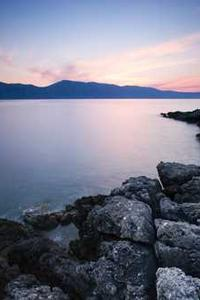

In [19]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi modal message with random image and text

pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/200/300").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content = ["Can you describe the content of this image?",img],source = "user")
img

In [20]:
print(multi_modal_message)

id='385e1ad4-79c6-41a6-9181-056f75179eab' source='user' models_usage=None metadata={} created_at=datetime.datetime(2025, 7, 29, 14, 53, 53, 254085, tzinfo=datetime.timezone.utc) content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x00000245EEA9D710>] type='MultiModalMessage'


In [21]:
result = await my_assistant.run(task = multi_modal_message)
print(result)

messages=[MultiModalMessage(id='385e1ad4-79c6-41a6-9181-056f75179eab', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 53, 53, 254085, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x00000245EEA9D710>], type='MultiModalMessage'), TextMessage(id='9cd0246b-5482-4194-80c9-c0943c943bf9', source='Assistant', models_usage=RequestUsage(prompt_tokens=532, completion_tokens=56), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 57, 21, 821838, tzinfo=datetime.timezone.utc), content='This image depicts a serene seascape during sunset or sunrise. The foreground features rugged, rocky shores, while the calm water reflects the soft colors of the sky. In the background, there are silhouetted mountains under a sky painted with shades of pink, purple, and blue.', type='TextMessage')] stop_reason=None


messages=[MultiModalMessage(id='385e1ad4-79c6-41a6-9181-056f75179eab', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 53, 53, 254085, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x00000245EEA9D710>], type='MultiModalMessage'), TextMessage(id='9cd0246b-5482-4194-80c9-c0943c943bf9', source='Assistant', models_usage=RequestUsage(prompt_tokens=532, completion_tokens=56), metadata={}, created_at=datetime.datetime(2025, 7, 29, 14, 57, 21, 821838, tzinfo=datetime.timezone.utc), content=```'This image depicts a serene seascape during sunset or sunrise. The foreground features rugged, rocky shores, while the calm water reflects the soft colors of the sky. In the background, there are silhouetted mountains under a sky painted with shades of pink, purple, and blue.'```, type='TextMessage')] stop_reason=None

In [22]:
from pydantic import BaseModel

class PlanetInfo(BaseModel):
    name:str
    color:str
    distance:str

structured_model_client = OpenAIChatCompletionClient(
    model = "gpt-4o",
    api_key=api_key,
    response_format=PlanetInfo
)

my_assistant_2 = AssistantAgent(name = "Assistant_2",model_client=structured_model_client)


In [23]:
result = await my_assistant_2.run(task = "Who are you?")
print(result)

messages=[TextMessage(id='ca7d635f-6d4d-44a0-aafd-32f9547db183', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 15, 3, 47, 353410, tzinfo=datetime.timezone.utc), content='Who are you?', type='TextMessage'), TextMessage(id='a4934901-571a-4d4f-bbea-af7a34fcf23d', source='Assistant_2', models_usage=RequestUsage(prompt_tokens=97, completion_tokens=15), metadata={}, created_at=datetime.datetime(2025, 7, 29, 15, 3, 48, 136047, tzinfo=datetime.timezone.utc), content='{"name":"Mars","color":"Red","distance":"228 million kilometers"}', type='TextMessage')] stop_reason=None


messages=[TextMessage(id='ca7d635f-6d4d-44a0-aafd-32f9547db183', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 29, 15, 3, 47, 353410, tzinfo=datetime.timezone.utc), content='Who are you?', type='TextMessage'), TextMessage(id='a4934901-571a-4d4f-bbea-af7a34fcf23d', source='Assistant_2', models_usage=RequestUsage(prompt_tokens=97, completion_tokens=15), metadata={}, created_at=datetime.datetime(2025, 7, 29, 15, 3, 48, 136047, tzinfo=datetime.timezone.utc), content='```{"name":"Mars","color":"Red","distance":"228 million kilometers"}'```, type='TextMessage')] stop_reason=None

# run_stream